<table><tbody><tr><th><p><img alt="Emblema" src="https://cdn6.aptoide.com/imgs/6/f/4/6f4821daa840da8fe971445350759fe5_icon.png" style="width:150px;"></p></th><th><p><strong>Inteligencia Artificial</strong></p><p><strong>Grado en Ingeniería Informática en Sistemas de Información – Curso 2024/2025</strong></p><p><strong>ENSEÑANZAS PRÁCTICAS Y DE DESARROLLO</strong></p><h1>EPD 2.1: Machine Learning - Regresión Lineal univariable</h1></th></tr></tbody></table>

____

## Objetivos
- Implementación en Python de un algoritmo de Regresión Lineal univariable y su aplicación a datos.

___

## Bibliografía Básica
- Machine Learning. Tom Mitchell. MacGraw-Hill, 1997

___

## Ejercicios

Implementar y aplicar regresión lineal con una variable para predecir los beneficios de un restaurante ambulante. Ponte en el papel del Director Ejecutivo de una franquicia de este tipo de restaurantes y estás considerando diferentes ciudades para la apertura de un nuevo establecimiento. La cadena ya cuenta con restaurantes en varias ciudades, y dispone de los datos de los beneficios y las poblaciones de las ciudades. Deberías utilizar los datos como ayuda para seleccionar en qué ciudad poner el siguiente establecimiento.

El fichero ex1data1.txt contiene los datos para nuestro problema de regresión lineal. La primera columna es la población de una ciudad y la segunda es el beneficio de un establecimiento en esa ciudad. Un valor negativo de beneficio indica una pérdida.

Utilizar este mismo notebook para ir incorporando el código y las llamadas a las funciones que se piden en los siguientes ejercicios. Apóyese además en los scripts .py adicionales, implementando las funciones que considere oportunas.

#### EJERCICIO 01.
Normalmente, antes de empezar cualquier tarea se suele visualizar el conjunto de datos. 
Añadir el código necesario para cargar los datos, e implementar la función plotData(X,y) en el archivo plotData.py para representar los datos gráficamente. Debajo se muestra un ejemplo del resultado de la visualización:

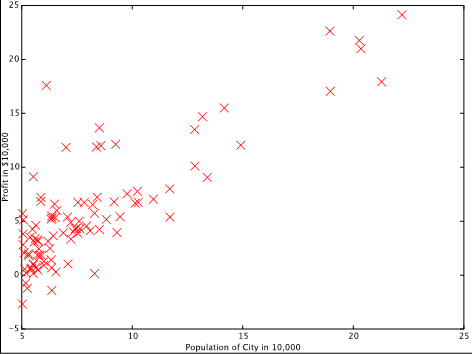

##### Solución:

In [1]:
#librerías (comunes a todos los ejercicios)
from plotData import *
import pandas as pd
import numpy as np
import sklearn.linear_model
from computeCost import computeCost
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Función lectura fichero
def read_file(file_name):
    file = pd.read_csv(file_name, names=["poblacion","beneficio"])
    X = pd.DataFrame({"poblacion": file["poblacion"]})
    y = pd.DataFrame({"beneficio": file["beneficio"]})
    return X, y

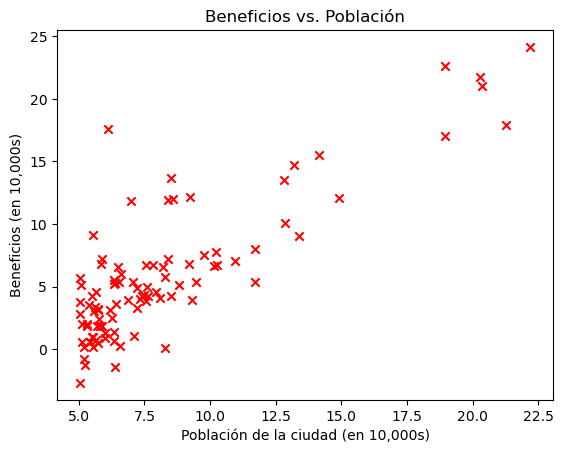

In [3]:
# Carga del conjunto de datos
X, y = read_file("ex1data1.txt")

# Llamada a la función implementada
plotData(X,y)

#### EJERCICIO 02.
El objetivo de la regresión lineal es minimizar el coste de la función:

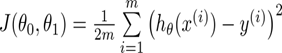

Implementar la función **computeCost(X, y, theta)** en el fichero computeCost.py de manera que devuelva el valor del coste. La matriz X es la matriz formada por la población de cada ciudad e y es el vector formado por los beneficios del establecimiento de cada ciudad. Para facilitar las operaciones vectorizadas, añada una columna con todos sus elementos a 1 a la matriz X como primera columna, de esta manera se podrá calcular la hipótesis h que viene dada por el modelo lineal:



Para comenzar inicializar los parámetros theta a 0. El resultado del coste inicial debe ser 32,07.

##### Solución:

In [4]:
# Some gradient descent settings: Añada una columna con todos sus elementos a 1 a la matriz X como primera columna e inicializar los parámetros theta a 0
ones = np.ones((len(y),1))
X['ones'] = ones
X = X[['ones','poblacion']]

# Inicializar theta a ceros
theta= np.zeros((2,1))

J = computeCost(X,y,theta)
print("\nEj2:\n\tEl coste con theta 0 es ", J)


Ej2:
	El coste con theta 0 es  beneficio    32.072734
dtype: float64


#### EJERCICIO 03.
Implementar el método de descenso del gradiente (ver documento de EB, p. 42). La función recibirá como parámetro, además de los datos X e y, los parámetros theta, alpha y el número de iteraciones. Estos dos últimos se pueden inicializar a 0,01 y 1500 respectivamente. La función deberá devolver los parámetros theta finales y un histórico con el coste en cada iteración. Mostrar por pantalla los valores de theta. Crear la función plotIterationsVsCost() para comprobar que el descenso del gradiente para los parámetros indicados funciona correctamente. Se representará el número de iteraciones vs el coste.

##### Solución:

In [5]:
def gradientDescent(X, y, theta, alpha, iterations):
    # Initialize some useful parameters
    m = len(y) # number of training examples
    current_iter = [] # Empty arrays to create a history dataframe
    current_cost = []

    # ====================== YOUR CODE HERE ======================
    # Instructions: Perform a single gradient step on the parameter vector theta
    # Hint: While debugging, it can be useful to print out the values
    #       of the cost function (computeCost) and gradient here.
    # We can do it with numpy matrix or dataframes: X = np.matrix(X.values) y = np.matrix(y.values)

    for i in range(iterations):
        h = np.dot(X, theta)
        error = h - y
        gradiente = (1 / m) * np.dot(X.T, error)
        aux = theta
        theta = aux - alpha * gradiente
        current_iter.append(i)
        current_cost.append(computeCost(X, y, theta))
    J_history = pd.DataFrame({'iteracion':current_iter, 'cost':current_cost})
    return theta, J_history

Theta found by gradient descent: 
 [[-3.63029144]
 [ 1.16636235]]

Cost reached at iteration number  1500 :  1499    beneficio    4.483388
dtype: float64
Name: cost, dtype: object


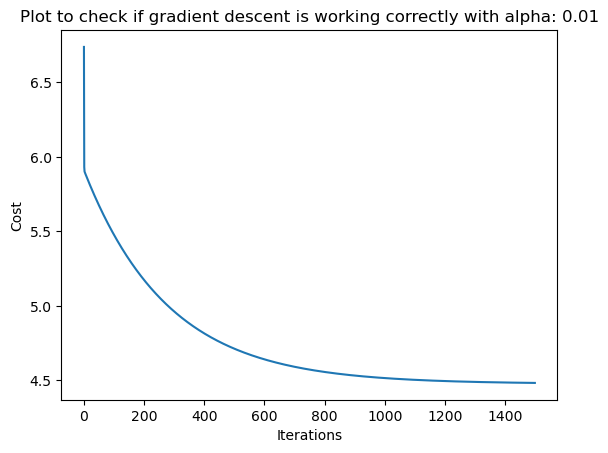

In [6]:
# Some gradient descent settings
iterations = 1500
alpha = 0.01
theta_opt, J_history = gradientDescent(X, y, theta, alpha, iterations)
# print theta to screen
print('Theta found by gradient descent: \n', theta_opt)
print('\nCost reached at iteration number ', iterations, ": ", J_history[J_history['iteracion']==1499]['cost']) # El 1499 que pinta es la fila
plotIterationsVsCost(J_history, alpha)

#### EJERCICIO 04.
Representar gráficamente los resultados obtenidos y calcular la predicción de beneficios para una población de 35000 y 70000 habitantes. Mantener la figura anterior para poder comprobar la diferencia con los datos originales como en la figura de la derecha.

##### Solución:

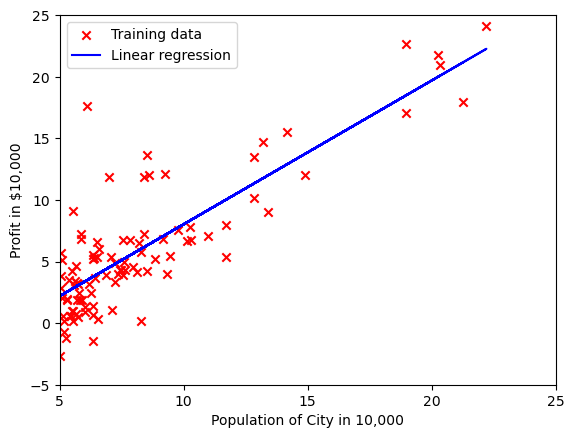

[[-3.63029144]
 [ 1.16636235]]
Predicción para 35,000 habitantes: [[40819.05197031]]
Predicción para 70,000 habitantes: [[81641.73423205]]


In [7]:
# Plot the linear fit
plotData_linearRegression(X,y,theta_opt)
print(theta_opt)
# Predict values for population sizes of 35, 000 and 70, 000
population_1 = np.array([[1, 35000]])
prediction_1 = np.dot(population_1, theta_opt)
print("Predicción para 35,000 habitantes:", prediction_1)

population_2 = np.array([[1, 70000]])
prediction_2 = np.dot(population_2, theta_opt)
print("Predicción para 70,000 habitantes:", prediction_2)

## Problemas

#### PROBLEMA 01.
En el caso de estudio utilizado en los ejercicios anteriores, probar con diferentes valores de alpha (0.1, 0.03, 0.01, …). Representar y comparar los diferentes resultados obtenidos con la función plotIterationsVsCost() para comprobar qué valores de alpha son válidos y cuáles no. Finalmente, utilizar los mejores valores de theta para predecir de nuevo los beneficios para una población de 35000 y 70000 habitantes. Curiosidad: realizar también ambas predicciones utilizando diferentes modelos de regresión lineal de la librería sklearn (sklearn.linear_model) como por ejemplo: LinearRegression(), Ridge() o Lasso().

##### Solución:

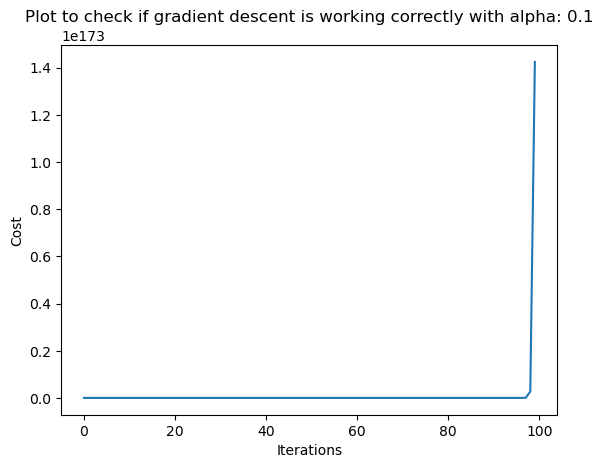

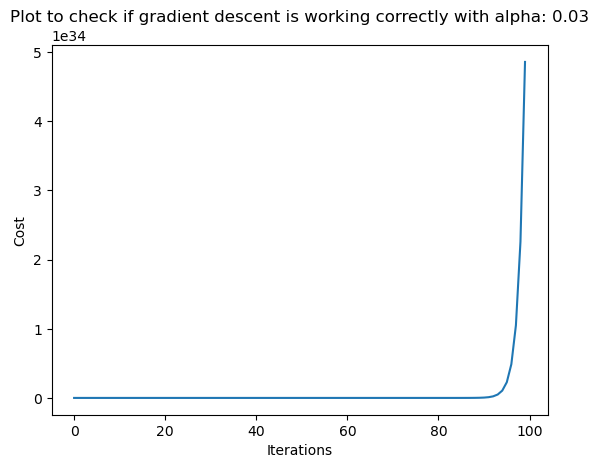

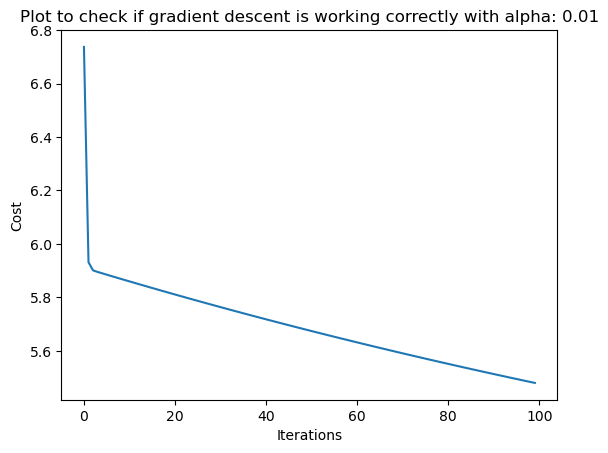

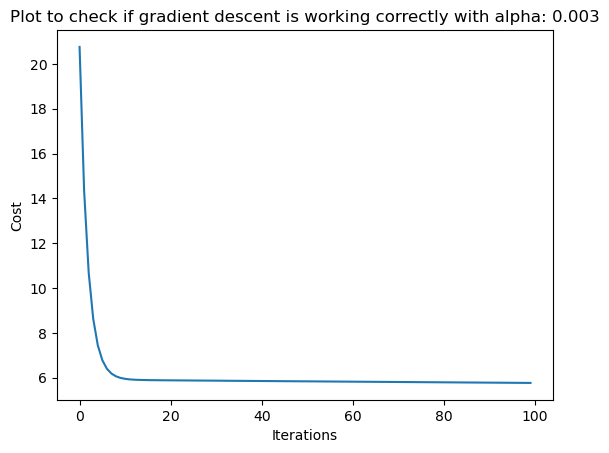

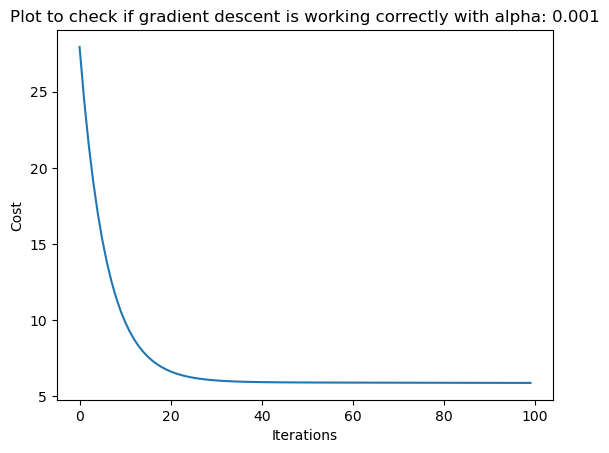

Predicción para 35,000 habitantes: 30084.776828316575
Predicción para 70,000 habitantes: 60170.13021286348


In [8]:
vecAlpha = [0.1, 0.03, 0.01, 0.003, 0.001]
iterations = 100
theta_opt_max = np.zeros((2,1))

for i in range(len(vecAlpha)):
    alpha = vecAlpha[i]
    theta = np.zeros((2,1))
    
    theta_opt, J_history = gradientDescent(X, y, theta, alpha, iterations)
    plotIterationsVsCost(J_history, alpha)
    
    if computeCost(X, y, theta_opt).item() < computeCost(X, y, theta_opt_max).item():
        theta_opt_max = theta_opt

population_1 = np.array([[1, 35000]])
prediction_1 = np.dot(population_1, theta_opt_max)
print("Predicción para 35,000 habitantes:", prediction_1[0, 0])

population_2 = np.array([[1, 70000]])
prediction_2 = np.dot(population_2, theta_opt_max)
print("Predicción para 70,000 habitantes:", prediction_2[0, 0])


#### PROBLEMA 02.
Incluir el código necesario en main.py para obtener las gráficas de la función de coste que se muestran a continuación. Para ello, utilizar los comandos plot_surface y contour.

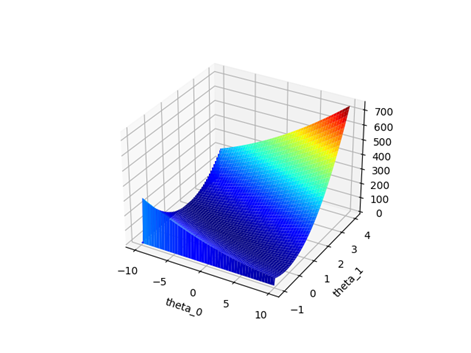 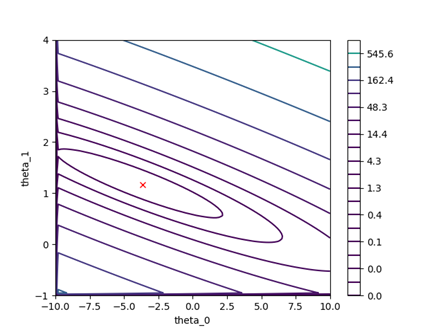

##### Solución:

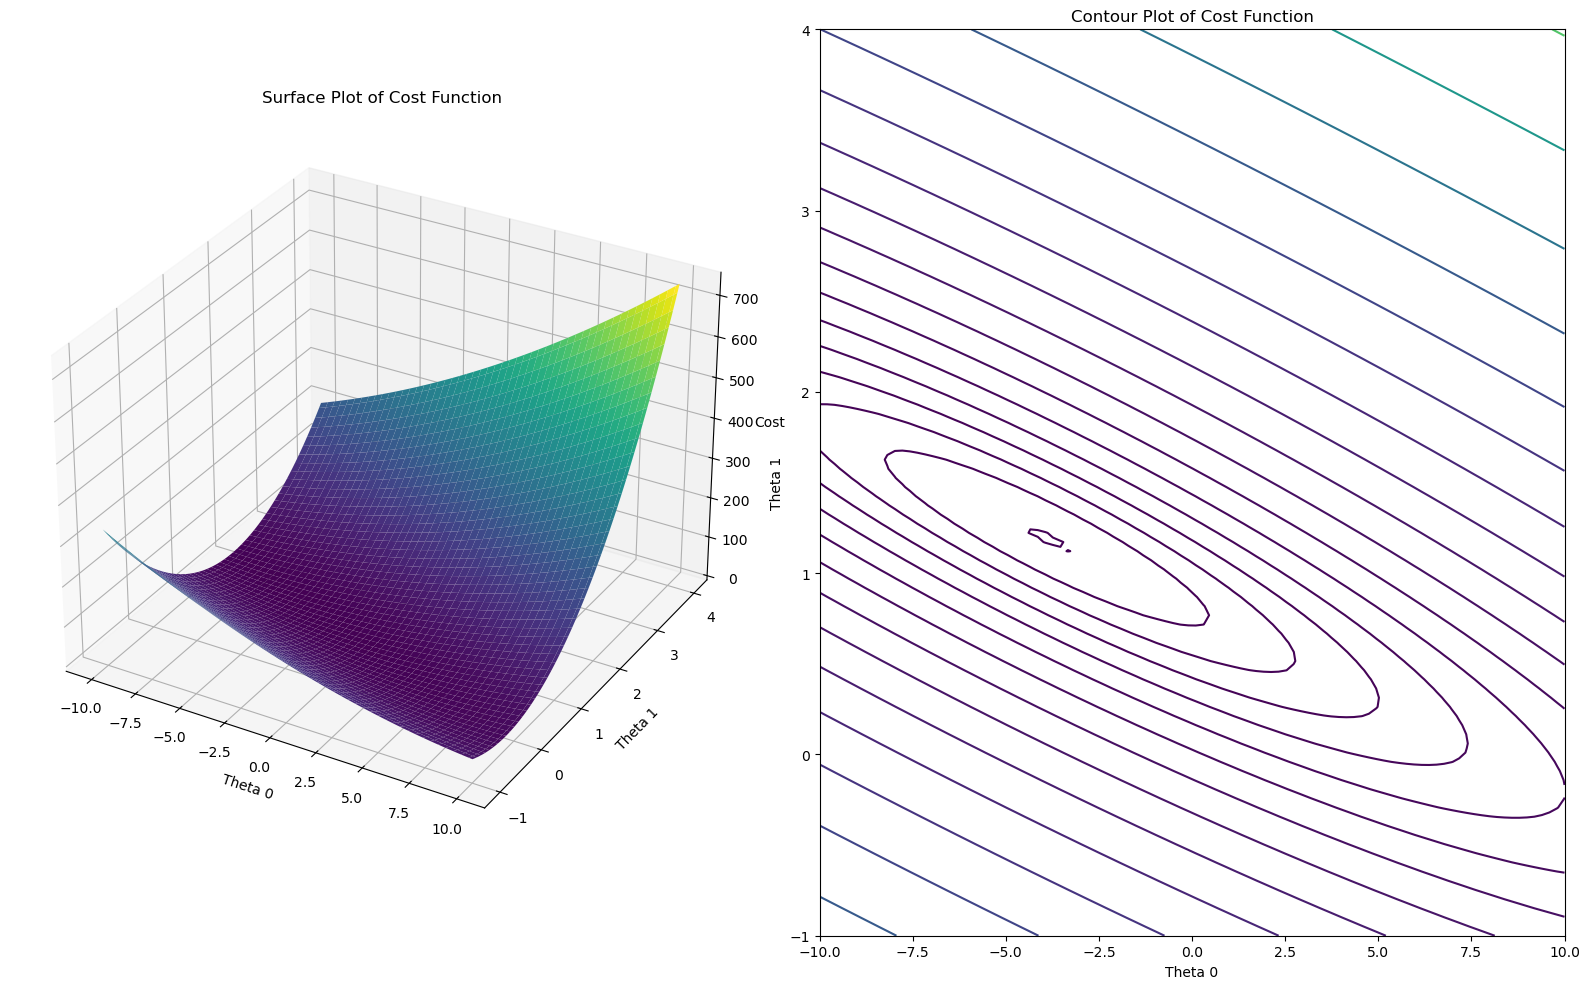

In [9]:
import numpy as np
import matplotlib.pyplot as plt

theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta_0), len(theta_1)))

X = np.array(X)
y = np.array(y).flatten()

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        theta = np.array([theta_0[i], theta_1[j]])
        J_vals[i, j] = computeCost(X, y, theta)

fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(121, projection='3d')
T0, T1 = np.meshgrid(theta_0, theta_1)
ax1.plot_surface(T0, T1, J_vals.T, cmap='viridis')
ax1.set_xlabel('Theta 0')
ax1.set_ylabel('Theta 1')
ax1.set_zlabel('Cost')
ax1.set_title('Surface Plot of Cost Function')

ax2 = fig.add_subplot(122)
contour_levels = np.logspace(-1, 3, 30)
ax2.contour(T0, T1, J_vals.T, levels=contour_levels, cmap='viridis')
ax2.set_xlabel('Theta 0')
ax2.set_ylabel('Theta 1')
ax2.set_title('Contour Plot of Cost Function')

plt.tight_layout()
plt.show()


#### PROBLEMA 03.
Utilizar la regresión lineal para predecir los precios de casas. Suponer que queremos vender nuestra casa y queremos saber cuál sería un buen precio de mercado. Una opción sería recolectar información de ventas de casas recientes y crear un modelo de precios de casas.

El fichero ex1data2.txt contiene un conjunto de entrenamiento de precios de casas en una ciudad estadounidense. La primera columna corresponde con el tamaño de la casa (en pies cuadrados), la segunda columna indica el número de dormitorios, y la tercera el precio de la casa. 

Utilizando la función de coste y el método de descenso del gradiente antes implementados, indica cuál de los dos atributos determina mejor el precio de la casa. Considerar los valores 0,03 y 200 para alpha y el número de iteraciones respectivamente. Como en el ejercicio 4, visualizar los resultados obtenidos con cada una de las opciones o atributos.

##### Solución:

C:\Users\danit\OneDrive - Universidad Pablo de Olavide de Sevilla\UNI\4º_Curso\1º Semestre\IA\Github\IA\EPD\EPD2\computeCost.py:9: RuntimeWarning: overflow encountered in power
  return ((np.sum(np.power((np.dot(X,theta)-y),2), axis=0))/(2*len(y) ))
C:\Users\danit\AppData\Local\Temp\ipykernel_16764\3367036925.py:18: RuntimeWarning: invalid value encountered in subtract
  theta = aux - alpha * gradiente


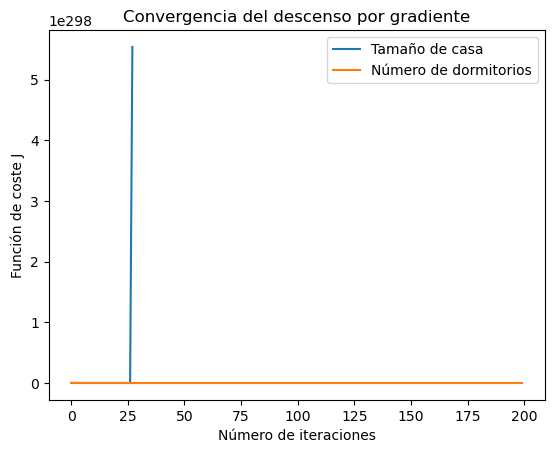

In [10]:
def read_file_2(file_name):
    file = pd.read_csv(file_name, header=None, names=["Tamaño", "Dormitorios", "Precio"])
    X = pd.DataFrame({"Tamaño": file["Tamaño"], "Dormitorios": file["Dormitorios"]})
    y = pd.DataFrame({"Precio": file["Precio"]})
    return X, y

X, y = read_file_2('ex1data2.txt')

X = np.concatenate([np.ones((X.shape[0], 1)), X.values], axis=1)

alpha = 0.03
iterations = 200
y = y.values.flatten()
theta_size = np.zeros(2)
theta_opt_size, J_history_size = gradientDescent(X[:, [0, 1]], y, theta_size, alpha, iterations)
theta_bedrooms = np.zeros(2)
theta_opt_bedrooms, J_history_bedrooms = gradientDescent(X[:, [0, 2]], y, theta_bedrooms, alpha, iterations)

plt.plot(J_history_size['iteracion'], J_history_size['cost'], label='Tamaño de casa')
plt.plot(J_history_bedrooms['iteracion'], J_history_bedrooms['cost'], label='Número de dormitorios')

plt.xlabel('Número de iteraciones')
plt.ylabel('Función de coste J')
plt.title('Convergencia del descenso por gradiente')
plt.legend()
plt.show()

